<a href="https://colab.research.google.com/github/LimaHossain/LimaH.github.io/blob/main/Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

In [3]:
def min_dist(points, res):

    points = torch.tensor(points, dtype=torch.float32)

    x = torch.linspace(0, 1, res)
    y = torch.linspace(0, 1, res)
    grid_x, grid_y = torch.meshgrid(x, y, indexing="xy")

    grid = torch.stack([grid_x, grid_y], dim=-1)
    grid = grid.unsqueeze(2)
    points = points.unsqueeze(0).unsqueeze(0)
    squared_distances = torch.sum((grid - points) ** 2, dim=-1)
    min_distances = torch.min(squared_distances, dim=-1).values

    return torch.sqrt(min_distances)

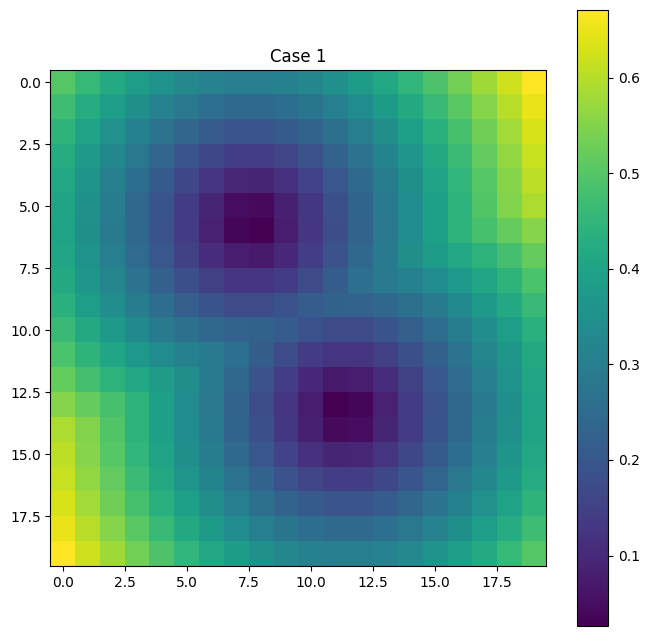

In [4]:
import matplotlib.pyplot as plt

# Case 1
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Case 1")
plt.show()

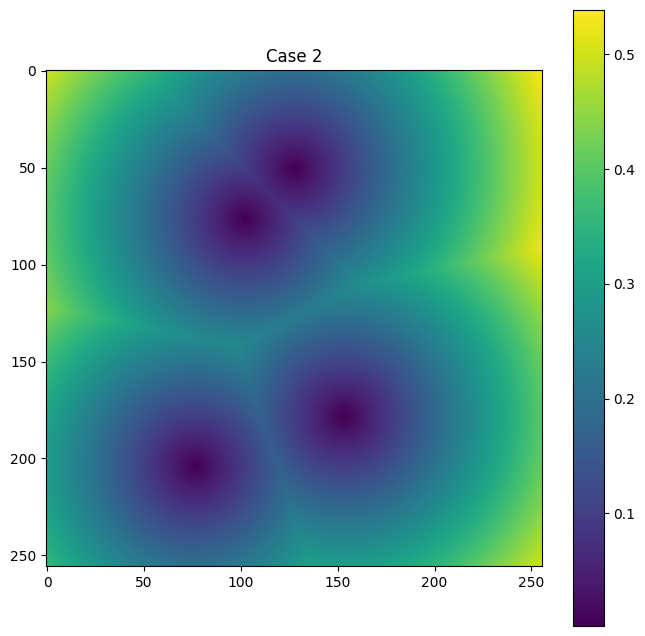

In [5]:
# Case 2
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data.numpy(), cmap="viridis")
plt.colorbar()
plt.title("Case 2")
plt.show()

In [6]:
def min_dist(points, res):

    points = torch.tensor(points, dtype=torch.float32)[:, :, :2]

    x = torch.linspace(0, 1, res)
    y = torch.linspace(0, 1, res)
    grid_x, grid_y = torch.meshgrid(x, y, indexing="xy")
    grid = torch.stack([grid_x, grid_y], dim=-1)

    batch_size, num_points, _ = points.shape
    grid = grid.unsqueeze(0).unsqueeze(3)
    points = points.unsqueeze(1).unsqueeze(2)

    squared_distances = torch.sum((grid - points) ** 2, dim=-1)
    min_distances = torch.min(squared_distances, dim=-1).values

    return torch.sqrt(min_distances)

Points Shape: (3, 4, 3)
Distances Shape: torch.Size([3, 25, 25])


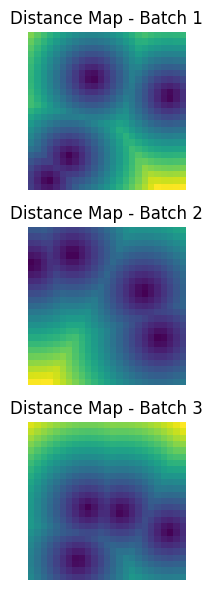

In [7]:
def create_points(batch_size, num_points):
    coords = np.random.rand(batch_size, num_points, 2)
    values = np.random.randint(0, 10, batch_size * num_points).reshape(batch_size, num_points, 1)
    return np.concatenate((coords, values), axis=2)


batch_size = 3
num_points = 4
points = create_points(batch_size, num_points)
print(f"Points Shape: {points.shape}")

res = 25
distances = min_dist(points, res)
print(f"Distances Shape: {distances.shape}")

fig, axs = plt.subplots(batch_size, 1, figsize=(6, 6))
for i in range(batch_size):
    axs[i].imshow(distances[i].numpy(), cmap='viridis')
    axs[i].set_title(f'Distance Map - Batch {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()